<small><i>October 2021 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Unsupervised learning in Keras

+ Autoencoders
+ Pretraining
+ Manifold Learning
+ Sparse Coding
+ A brief note on Variational Autoencoders


# Autoencoders

Let us train a simple autoencoder with a physical bottleneck. 

In [1]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [3]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="linear"),
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])


from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)

model.fit(train, train, epochs=300, batch_size = 32)


Epoch 1/300
54/54 [==============================] - 1s 2ms/step - loss: 60.4932 - mean_squared_error: 60.4932
Epoch 2/300
54/54 [==============================] - 0s 2ms/step - loss: 59.2043 - mean_squared_error: 59.2043
Epoch 3/300
54/54 [==============================] - 0s 2ms/step - loss: 58.0799 - mean_squared_error: 58.0799
Epoch 4/300
54/54 [==============================] - 0s 2ms/step - loss: 56.6671 - mean_squared_error: 56.6671
Epoch 5/300
54/54 [==============================] - 0s 2ms/step - loss: 54.6729 - mean_squared_error: 54.6729
Epoch 6/300
54/54 [==============================] - 0s 4ms/step - loss: 51.7296 - mean_squared_error: 51.7296
Epoch 7/300
54/54 [==============================] - 0s 3ms/step - loss: 47.5834 - mean_squared_error: 47.5834
Epoch 8/300
54/54 [==============================] - 0s 3ms/step - loss: 42.2393 - mean_squared_error: 42.2393
Epoch 9/300
54/54 [==============================] - 0s 2ms/step - loss: 36.3409 - mean_squared_error: 36.3409
E

54/54 [==============================] - 0s 2ms/step - loss: 16.6989 - mean_squared_error: 16.6989
Epoch 75/300
54/54 [==============================] - 0s 2ms/step - loss: 16.6653 - mean_squared_error: 16.6653
Epoch 76/300
54/54 [==============================] - 0s 2ms/step - loss: 16.6303 - mean_squared_error: 16.6303
Epoch 77/300
54/54 [==============================] - 0s 2ms/step - loss: 16.5959 - mean_squared_error: 16.5959
Epoch 78/300
54/54 [==============================] - 0s 2ms/step - loss: 16.5621 - mean_squared_error: 16.5621
Epoch 79/300
54/54 [==============================] - 0s 2ms/step - loss: 16.5261 - mean_squared_error: 16.5261
Epoch 80/300
54/54 [==============================] - 0s 2ms/step - loss: 16.4921 - mean_squared_error: 16.4921
Epoch 81/300
54/54 [==============================] - 0s 2ms/step - loss: 16.4568 - mean_squared_error: 16.4568
Epoch 82/300
54/54 [==============================] - 0s 2ms/step - loss: 16.4204 - mean_squared_error: 16.4204
Epoch

54/54 [==============================] - 0s 2ms/step - loss: 14.1897 - mean_squared_error: 14.1897
Epoch 147/300
54/54 [==============================] - 0s 2ms/step - loss: 14.1640 - mean_squared_error: 14.1640
Epoch 148/300
54/54 [==============================] - 0s 1ms/step - loss: 14.1374 - mean_squared_error: 14.1374
Epoch 149/300
54/54 [==============================] - 0s 2ms/step - loss: 14.1124 - mean_squared_error: 14.1124
Epoch 150/300
54/54 [==============================] - 0s 2ms/step - loss: 14.0869 - mean_squared_error: 14.0869
Epoch 151/300
54/54 [==============================] - 0s 2ms/step - loss: 14.0623 - mean_squared_error: 14.0623
Epoch 152/300
54/54 [==============================] - 0s 2ms/step - loss: 14.0371 - mean_squared_error: 14.0371
Epoch 153/300
54/54 [==============================] - 0s 2ms/step - loss: 14.0135 - mean_squared_error: 14.0135
Epoch 154/300
54/54 [==============================] - 0s 2ms/step - loss: 13.9896 - mean_squared_error: 13.98

54/54 [==============================] - 0s 2ms/step - loss: 12.7478 - mean_squared_error: 12.7478
Epoch 219/300
54/54 [==============================] - 0s 2ms/step - loss: 12.7279 - mean_squared_error: 12.7279
Epoch 220/300
54/54 [==============================] - 0s 2ms/step - loss: 12.7082 - mean_squared_error: 12.7082
Epoch 221/300
54/54 [==============================] - 0s 2ms/step - loss: 12.6892 - mean_squared_error: 12.6892
Epoch 222/300
54/54 [==============================] - 0s 2ms/step - loss: 12.6699 - mean_squared_error: 12.6699
Epoch 223/300
54/54 [==============================] - 0s 2ms/step - loss: 12.6500 - mean_squared_error: 12.6500
Epoch 224/300
54/54 [==============================] - 0s 2ms/step - loss: 12.6308 - mean_squared_error: 12.6308
Epoch 225/300
54/54 [==============================] - 0s 2ms/step - loss: 12.6108 - mean_squared_error: 12.6108
Epoch 226/300
54/54 [==============================] - 0s 1ms/step - loss: 12.5897 - mean_squared_error: 12.58

54/54 [==============================] - 0s 2ms/step - loss: 11.3255 - mean_squared_error: 11.3255
Epoch 291/300
54/54 [==============================] - 0s 2ms/step - loss: 11.3094 - mean_squared_error: 11.3094
Epoch 292/300
54/54 [==============================] - 0s 2ms/step - loss: 11.2928 - mean_squared_error: 11.2928
Epoch 293/300
54/54 [==============================] - 0s 2ms/step - loss: 11.2762 - mean_squared_error: 11.2762
Epoch 294/300
54/54 [==============================] - 0s 2ms/step - loss: 11.2611 - mean_squared_error: 11.2611
Epoch 295/300
54/54 [==============================] - 0s 2ms/step - loss: 11.2442 - mean_squared_error: 11.2442
Epoch 296/300
54/54 [==============================] - 0s 2ms/step - loss: 11.2290 - mean_squared_error: 11.2290
Epoch 297/300
54/54 [==============================] - 0s 1ms/step - loss: 11.2121 - mean_squared_error: 11.2121
Epoch 298/300
54/54 [==============================] - 0s 2ms/step - loss: 11.1959 - mean_squared_error: 11.19

Let us check some predictions for training

1/1 [==============================] - 0s 87ms/step


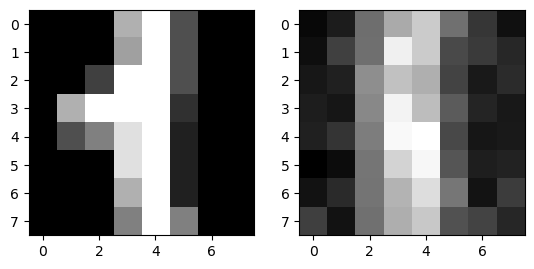

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 101
reconstruction = model.predict(train[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

The same for test

1/1 [==============================] - 0s 19ms/step


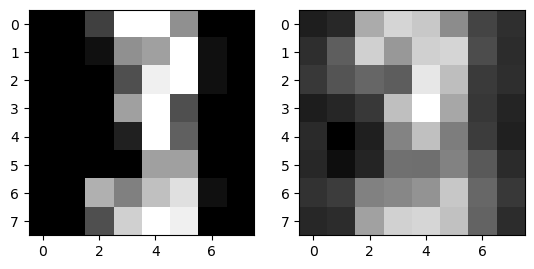

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 10
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Learning representations and pretraining

Let us use the intermediate representation for something.

In [6]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.2)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = keras.layers.Dense(16,activation="relu")(encoder_output)
x = keras.layers.Dense(32,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")


#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [7]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])


from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)

history = model.fit(train, train, batch_size=32, epochs=100, validation_split=0.2)


Epoch 1/100
43/43 [==============================] - 1s 6ms/step - loss: 57.8316 - accuracy: 0.0560 - val_loss: 56.5987 - val_accuracy: 0.0706
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 55.4732 - accuracy: 0.0818 - val_loss: 54.0417 - val_accuracy: 0.0853
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 52.4652 - accuracy: 0.0995 - val_loss: 50.7115 - val_accuracy: 0.1029
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 48.5963 - accuracy: 0.1164 - val_loss: 46.4514 - val_accuracy: 0.1206
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 44.2453 - accuracy: 0.1444 - val_loss: 41.8078 - val_accuracy: 0.1529
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 39.8914 - accuracy: 0.1857 - val_loss: 37.5477 - val_accuracy: 0.1882
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 36.1616 - accuracy: 0.2122 - val_loss: 33.9199 - val_accuracy: 0.1824

Epoch 58/100
43/43 [==============================] - 0s 2ms/step - loss: 16.4390 - accuracy: 0.2424 - val_loss: 15.9180 - val_accuracy: 0.2176
Epoch 59/100
43/43 [==============================] - 0s 3ms/step - loss: 16.4362 - accuracy: 0.2167 - val_loss: 15.9054 - val_accuracy: 0.2353
Epoch 60/100
43/43 [==============================] - 0s 2ms/step - loss: 16.3749 - accuracy: 0.2307 - val_loss: 15.8828 - val_accuracy: 0.2265
Epoch 61/100
43/43 [==============================] - 0s 2ms/step - loss: 16.3697 - accuracy: 0.2203 - val_loss: 15.8728 - val_accuracy: 0.2441
Epoch 62/100
43/43 [==============================] - 0s 2ms/step - loss: 16.3975 - accuracy: 0.2329 - val_loss: 15.8607 - val_accuracy: 0.2294
Epoch 63/100
43/43 [==============================] - 0s 2ms/step - loss: 16.3296 - accuracy: 0.2307 - val_loss: 15.8678 - val_accuracy: 0.2294
Epoch 64/100
43/43 [==============================] - 0s 3ms/step - loss: 16.3097 - accuracy: 0.2225 - val_loss: 15.8392 - val_accuracy:

In [8]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 15.7963 - accuracy: 0.0700 - 25ms/epoch - 6ms/step


1/1 [==============================] - 0s 68ms/step


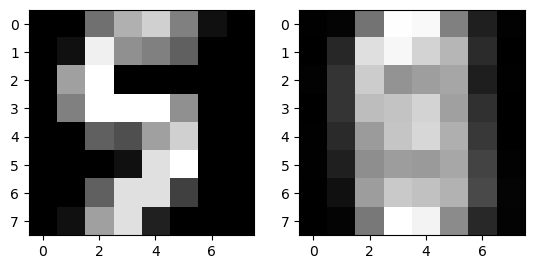

In [9]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [10]:
model.save("damodel")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("damodel")

INFO:tensorflow:Assets written to: damodel\assets


INFO:tensorflow:Assets written to: damodel\assets


1/1 [==============================] - 0s 74ms/step


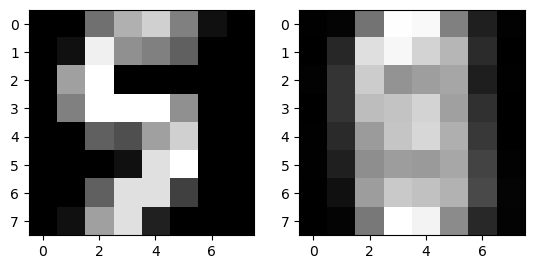

In [11]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [12]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [13]:
code = feature_ext(train)

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [15]:
print(code)

tf.Tensor(
[[50.21602  24.666002]
 [57.623688 20.282564]
 [54.38461  14.197126]
 ...
 [67.29072  21.986074]
 [60.21099  16.700428]
 [55.55891  34.328053]], shape=(1697, 2), dtype=float32)


In [16]:
code = feature_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.41
0.97


With just 2 features??????

In [17]:
code[1,:],test_y[1]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([53.67351 ,  8.170483], dtype=float32)>,
 9)

# Physical vs Logical bottlenecks: Sparse coding

Let us try a logical bottleneck.

In [18]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

class SparseRegularizationLayer(layers.Layer):
    def call(self, inputs):
        self.add_loss(tf.reduce_sum(tf.abs(inputs))*0.001)
        return inputs  # Pass-through layer.



input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(128,activation="relu")(x)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(512,activation="relu")(x)
encoder_output = SparseRegularizationLayer()(x)
x = keras.layers.Dense(256,activation="relu")(encoder_output)
x = keras.layers.Dense(128,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")


In [19]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=200, validation_split=0.2)


Epoch 1/200
22/22 [==============================] - 1s 12ms/step - loss: 35.4309 - accuracy: 0.1223 - val_loss: 22.9699 - val_accuracy: 0.1765
Epoch 2/200
22/22 [==============================] - 0s 6ms/step - loss: 21.3820 - accuracy: 0.1776 - val_loss: 19.0898 - val_accuracy: 0.2059
Epoch 3/200
22/22 [==============================] - 0s 6ms/step - loss: 18.0456 - accuracy: 0.1872 - val_loss: 16.2162 - val_accuracy: 0.1618
Epoch 4/200
22/22 [==============================] - 0s 6ms/step - loss: 15.5658 - accuracy: 0.1164 - val_loss: 14.4601 - val_accuracy: 0.0529
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 14.1442 - accuracy: 0.0987 - val_loss: 13.4817 - val_accuracy: 0.0235
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 13.0529 - accuracy: 0.0965 - val_loss: 11.4652 - val_accuracy: 0.0971
Epoch 7/200
22/22 [==============================] - 0s 6ms/step - loss: 11.7842 - accuracy: 0.0995 - val_loss: 10.9812 - val_accuracy: 0.100

22/22 [==============================] - 0s 6ms/step - loss: 4.7641 - accuracy: 0.1393 - val_loss: 4.9655 - val_accuracy: 0.1941
Epoch 59/200
22/22 [==============================] - 0s 6ms/step - loss: 4.6735 - accuracy: 0.1290 - val_loss: 4.6974 - val_accuracy: 0.1441
Epoch 60/200
22/22 [==============================] - 0s 6ms/step - loss: 4.6423 - accuracy: 0.1186 - val_loss: 5.1557 - val_accuracy: 0.1118
Epoch 61/200
22/22 [==============================] - 0s 6ms/step - loss: 4.5033 - accuracy: 0.1304 - val_loss: 4.5697 - val_accuracy: 0.1382
Epoch 62/200
22/22 [==============================] - 0s 6ms/step - loss: 4.6583 - accuracy: 0.1231 - val_loss: 4.4249 - val_accuracy: 0.1118
Epoch 63/200
22/22 [==============================] - 0s 6ms/step - loss: 4.5785 - accuracy: 0.1334 - val_loss: 4.4963 - val_accuracy: 0.1647
Epoch 64/200
22/22 [==============================] - 0s 6ms/step - loss: 4.4782 - accuracy: 0.1371 - val_loss: 4.5939 - val_accuracy: 0.1176
Epoch 65/200
22/22 

Epoch 116/200
22/22 [==============================] - 0s 6ms/step - loss: 3.3985 - accuracy: 0.1474 - val_loss: 3.9562 - val_accuracy: 0.1118
Epoch 117/200
22/22 [==============================] - 0s 6ms/step - loss: 3.3472 - accuracy: 0.1349 - val_loss: 3.9919 - val_accuracy: 0.1088
Epoch 118/200
22/22 [==============================] - 0s 6ms/step - loss: 3.3664 - accuracy: 0.1378 - val_loss: 3.8511 - val_accuracy: 0.1059
Epoch 119/200
22/22 [==============================] - 0s 6ms/step - loss: 3.3664 - accuracy: 0.1363 - val_loss: 4.2732 - val_accuracy: 0.1235
Epoch 120/200
22/22 [==============================] - 0s 6ms/step - loss: 3.3577 - accuracy: 0.1437 - val_loss: 4.0743 - val_accuracy: 0.1265
Epoch 121/200
22/22 [==============================] - 0s 6ms/step - loss: 3.3174 - accuracy: 0.1496 - val_loss: 3.8479 - val_accuracy: 0.1529
Epoch 122/200
22/22 [==============================] - 0s 6ms/step - loss: 3.3390 - accuracy: 0.1577 - val_loss: 3.8936 - val_accuracy: 0.1147

22/22 [==============================] - 0s 7ms/step - loss: 2.7282 - accuracy: 0.1297 - val_loss: 3.6287 - val_accuracy: 0.1735
Epoch 174/200
22/22 [==============================] - 0s 6ms/step - loss: 2.7040 - accuracy: 0.1430 - val_loss: 3.5737 - val_accuracy: 0.1559
Epoch 175/200
22/22 [==============================] - 0s 6ms/step - loss: 2.7834 - accuracy: 0.1444 - val_loss: 3.7921 - val_accuracy: 0.1647
Epoch 176/200
22/22 [==============================] - 0s 6ms/step - loss: 2.7006 - accuracy: 0.1474 - val_loss: 3.5297 - val_accuracy: 0.0882
Epoch 177/200
22/22 [==============================] - 0s 7ms/step - loss: 2.7476 - accuracy: 0.1489 - val_loss: 3.6128 - val_accuracy: 0.1176
Epoch 178/200
22/22 [==============================] - 0s 7ms/step - loss: 2.7282 - accuracy: 0.1540 - val_loss: 3.4944 - val_accuracy: 0.1529
Epoch 179/200
22/22 [==============================] - 0s 6ms/step - loss: 2.6931 - accuracy: 0.1393 - val_loss: 3.5962 - val_accuracy: 0.1441
Epoch 180/200

In [20]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 3.1736 - accuracy: 0.1500 - 35ms/epoch - 9ms/step


1/1 [==============================] - 0s 74ms/step


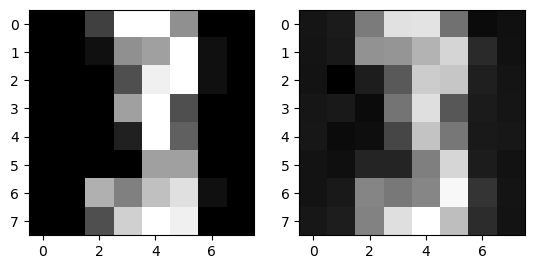

In [21]:
k= 10
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [22]:
sparse_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [23]:
code = sparse_ext(train)

In [24]:
code = code.numpy()

In [25]:
code[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.15334556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.7858849 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
non_zero=[]
for i in range(code.shape[0]):
    non_zero.append(len(np.where(code[i]>1e-6)[0]))

(array([  1.,   1.,  10.,  31.,   0.,  69.,  95., 164.,   0., 187., 200.,
        220.,   0., 191., 152., 113.,  95.,   0.,  77.,  40.,  25.,   0.,
         12.,   3.,   5.,   0.,   4.,   0.,   1.,   1.]),
 array([ 3.        ,  3.76666667,  4.53333333,  5.3       ,  6.06666667,
         6.83333333,  7.6       ,  8.36666667,  9.13333333,  9.9       ,
        10.66666667, 11.43333333, 12.2       , 12.96666667, 13.73333333,
        14.5       , 15.26666667, 16.03333333, 16.8       , 17.56666667,
        18.33333333, 19.1       , 19.86666667, 20.63333333, 21.4       ,
        22.16666667, 22.93333333, 23.7       , 24.46666667, 25.23333333,
        26.        ]),
 <BarContainer object of 30 artists>)

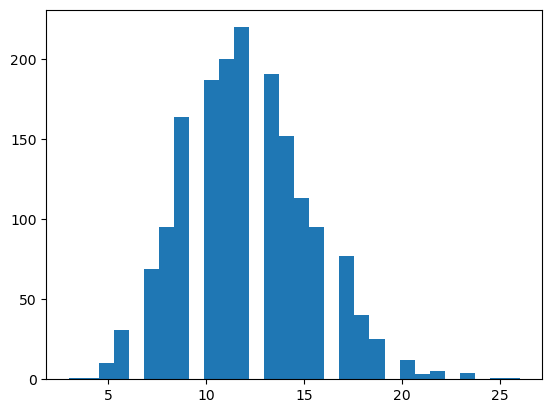

In [27]:
# Histogram of coded values
plt.hist(non_zero,bins = 30)

Let us check also the prediction capabilities from the intermediate representation.

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [29]:
code = sparse_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.97
0.97


# Generating with the decoder. From compressed to restored

Now let us get the decoder. Let us get the saved model first.

In [30]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

#Instanciate the layers that are going to be reused in two data flows, 
#training of the autoencoder and decoding from intermediate layer

dec1 = keras.layers.Dense(16,activation="relu")
dec2 = keras.layers.Dense(32,activation="relu")
dec3 = keras.layers.Dense(64)

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = dec1(encoder_output)
x = dec2(x)
decoder_output = dec3(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")



intermediate_input = keras.Input(shape=dec1.get_input_shape_at(0)) # get shape at node 0
x = dec1(intermediate_input)
x = dec2(x)
decoder_output = dec3(x)
decoder = keras.Model(inputs=intermediate_input, outputs=decoder_output, name="a_decoder")



#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
history = model.fit(train, train, batch_size=64, epochs=400, validation_split=0.2)


Epoch 1/400
22/22 [==============================] - 1s 9ms/step - loss: 60.7697 - accuracy: 7.3692e-04 - val_loss: 60.1093 - val_accuracy: 0.0059
Epoch 2/400
22/22 [==============================] - 0s 3ms/step - loss: 60.0397 - accuracy: 0.0066 - val_loss: 59.5374 - val_accuracy: 0.0029
Epoch 3/400
22/22 [==============================] - 0s 3ms/step - loss: 59.3687 - accuracy: 0.0044 - val_loss: 58.8920 - val_accuracy: 0.0029
Epoch 4/400
22/22 [==============================] - 0s 3ms/step - loss: 58.5831 - accuracy: 0.0029 - val_loss: 58.0895 - val_accuracy: 0.0029
Epoch 5/400
22/22 [==============================] - 0s 3ms/step - loss: 57.6657 - accuracy: 0.0015 - val_loss: 57.1259 - val_accuracy: 0.0029
Epoch 6/400
22/22 [==============================] - 0s 3ms/step - loss: 56.5886 - accuracy: 0.0015 - val_loss: 56.0024 - val_accuracy: 0.0029
Epoch 7/400
22/22 [==============================] - 0s 4ms/step - loss: 55.3228 - accuracy: 0.0015 - val_loss: 54.7054 - val_accuracy: 0.

Epoch 58/400
22/22 [==============================] - 0s 3ms/step - loss: 17.7133 - accuracy: 0.0825 - val_loss: 17.5401 - val_accuracy: 0.0882
Epoch 59/400
22/22 [==============================] - 0s 3ms/step - loss: 17.6385 - accuracy: 0.0833 - val_loss: 17.4838 - val_accuracy: 0.1088
Epoch 60/400
22/22 [==============================] - 0s 3ms/step - loss: 17.6321 - accuracy: 0.0825 - val_loss: 17.4387 - val_accuracy: 0.1029
Epoch 61/400
22/22 [==============================] - 0s 3ms/step - loss: 17.5739 - accuracy: 0.0884 - val_loss: 17.4070 - val_accuracy: 0.1029
Epoch 62/400
22/22 [==============================] - 0s 3ms/step - loss: 17.5633 - accuracy: 0.0892 - val_loss: 17.3700 - val_accuracy: 0.1088
Epoch 63/400
22/22 [==============================] - 0s 3ms/step - loss: 17.5096 - accuracy: 0.0833 - val_loss: 17.3379 - val_accuracy: 0.1088
Epoch 64/400
22/22 [==============================] - 0s 3ms/step - loss: 17.4629 - accuracy: 0.0855 - val_loss: 17.2834 - val_accuracy:

Epoch 115/400
22/22 [==============================] - 0s 3ms/step - loss: 16.0587 - accuracy: 0.1091 - val_loss: 15.7789 - val_accuracy: 0.1265
Epoch 116/400
22/22 [==============================] - 0s 3ms/step - loss: 16.0470 - accuracy: 0.1032 - val_loss: 15.7838 - val_accuracy: 0.1088
Epoch 117/400
22/22 [==============================] - 0s 3ms/step - loss: 16.0299 - accuracy: 0.1039 - val_loss: 15.7761 - val_accuracy: 0.1118
Epoch 118/400
22/22 [==============================] - 0s 3ms/step - loss: 16.0364 - accuracy: 0.1135 - val_loss: 15.7483 - val_accuracy: 0.1147
Epoch 119/400
22/22 [==============================] - 0s 3ms/step - loss: 16.0200 - accuracy: 0.1076 - val_loss: 15.7518 - val_accuracy: 0.1353
Epoch 120/400
22/22 [==============================] - 0s 4ms/step - loss: 16.0149 - accuracy: 0.1466 - val_loss: 15.7375 - val_accuracy: 0.1353
Epoch 121/400
22/22 [==============================] - 0s 3ms/step - loss: 16.0020 - accuracy: 0.1466 - val_loss: 15.7257 - val_ac

22/22 [==============================] - 0s 3ms/step - loss: 15.8066 - accuracy: 0.2108 - val_loss: 15.5193 - val_accuracy: 0.2118
Epoch 172/400
22/22 [==============================] - 0s 4ms/step - loss: 15.8078 - accuracy: 0.1982 - val_loss: 15.5123 - val_accuracy: 0.1882
Epoch 173/400
22/22 [==============================] - 0s 3ms/step - loss: 15.8196 - accuracy: 0.1916 - val_loss: 15.5052 - val_accuracy: 0.2118
Epoch 174/400
22/22 [==============================] - 0s 3ms/step - loss: 15.8019 - accuracy: 0.2174 - val_loss: 15.5086 - val_accuracy: 0.2176
Epoch 175/400
22/22 [==============================] - 0s 3ms/step - loss: 15.7775 - accuracy: 0.2063 - val_loss: 15.5085 - val_accuracy: 0.1882
Epoch 176/400
22/22 [==============================] - 0s 3ms/step - loss: 15.7813 - accuracy: 0.1820 - val_loss: 15.5105 - val_accuracy: 0.2206
Epoch 177/400
22/22 [==============================] - 0s 3ms/step - loss: 15.8076 - accuracy: 0.1938 - val_loss: 15.5014 - val_accuracy: 0.1912

22/22 [==============================] - 0s 4ms/step - loss: 15.6618 - accuracy: 0.1164 - val_loss: 15.3706 - val_accuracy: 0.1471
Epoch 228/400
22/22 [==============================] - 0s 4ms/step - loss: 15.6662 - accuracy: 0.1260 - val_loss: 15.3688 - val_accuracy: 0.1265
Epoch 229/400
22/22 [==============================] - 0s 4ms/step - loss: 15.6542 - accuracy: 0.1282 - val_loss: 15.3704 - val_accuracy: 0.1618
Epoch 230/400
22/22 [==============================] - 0s 4ms/step - loss: 15.6541 - accuracy: 0.1437 - val_loss: 15.3608 - val_accuracy: 0.1235
Epoch 231/400
22/22 [==============================] - 0s 4ms/step - loss: 15.6477 - accuracy: 0.1179 - val_loss: 15.3599 - val_accuracy: 0.1765
Epoch 232/400
22/22 [==============================] - 0s 4ms/step - loss: 15.6435 - accuracy: 0.1400 - val_loss: 15.3705 - val_accuracy: 0.1441
Epoch 233/400
22/22 [==============================] - 0s 4ms/step - loss: 15.6328 - accuracy: 0.1378 - val_loss: 15.3546 - val_accuracy: 0.1382

22/22 [==============================] - 0s 4ms/step - loss: 15.5492 - accuracy: 0.1069 - val_loss: 15.2512 - val_accuracy: 0.1147
Epoch 284/400
22/22 [==============================] - 0s 4ms/step - loss: 15.5334 - accuracy: 0.1024 - val_loss: 15.2597 - val_accuracy: 0.1176
Epoch 285/400
22/22 [==============================] - 0s 4ms/step - loss: 15.5224 - accuracy: 0.1061 - val_loss: 15.2469 - val_accuracy: 0.1147
Epoch 286/400
22/22 [==============================] - 0s 4ms/step - loss: 15.5230 - accuracy: 0.1024 - val_loss: 15.2580 - val_accuracy: 0.1176
Epoch 287/400
22/22 [==============================] - 0s 3ms/step - loss: 15.5339 - accuracy: 0.1024 - val_loss: 15.2503 - val_accuracy: 0.1147
Epoch 288/400
22/22 [==============================] - 0s 3ms/step - loss: 15.5235 - accuracy: 0.1039 - val_loss: 15.2467 - val_accuracy: 0.1147
Epoch 289/400
22/22 [==============================] - 0s 3ms/step - loss: 15.5338 - accuracy: 0.1032 - val_loss: 15.2382 - val_accuracy: 0.1118

22/22 [==============================] - 0s 3ms/step - loss: 15.4171 - accuracy: 0.0936 - val_loss: 15.1419 - val_accuracy: 0.0912
Epoch 340/400
22/22 [==============================] - 0s 3ms/step - loss: 15.4181 - accuracy: 0.0973 - val_loss: 15.1394 - val_accuracy: 0.0971
Epoch 341/400
22/22 [==============================] - 0s 3ms/step - loss: 15.4315 - accuracy: 0.0965 - val_loss: 15.1264 - val_accuracy: 0.0941
Epoch 342/400
22/22 [==============================] - 0s 3ms/step - loss: 15.3980 - accuracy: 0.0965 - val_loss: 15.1370 - val_accuracy: 0.0941
Epoch 343/400
22/22 [==============================] - 0s 3ms/step - loss: 15.4014 - accuracy: 0.0936 - val_loss: 15.1419 - val_accuracy: 0.0971
Epoch 344/400
22/22 [==============================] - 0s 3ms/step - loss: 15.4135 - accuracy: 0.0973 - val_loss: 15.1266 - val_accuracy: 0.0971
Epoch 345/400
22/22 [==============================] - 0s 3ms/step - loss: 15.3990 - accuracy: 0.0965 - val_loss: 15.1272 - val_accuracy: 0.0941

22/22 [==============================] - 0s 4ms/step - loss: 15.3049 - accuracy: 0.0840 - val_loss: 15.0251 - val_accuracy: 0.0735
Epoch 396/400
22/22 [==============================] - 0s 4ms/step - loss: 15.2879 - accuracy: 0.0774 - val_loss: 15.0080 - val_accuracy: 0.0794
Epoch 397/400
22/22 [==============================] - 0s 4ms/step - loss: 15.2913 - accuracy: 0.0789 - val_loss: 15.0116 - val_accuracy: 0.0765
Epoch 398/400
22/22 [==============================] - 0s 4ms/step - loss: 15.2950 - accuracy: 0.0884 - val_loss: 15.0139 - val_accuracy: 0.0794
Epoch 399/400
22/22 [==============================] - 0s 4ms/step - loss: 15.2919 - accuracy: 0.0847 - val_loss: 15.0164 - val_accuracy: 0.0765
Epoch 400/400
22/22 [==============================] - 0s 3ms/step - loss: 15.2756 - accuracy: 0.0877 - val_loss: 14.9931 - val_accuracy: 0.0765


In [32]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
intermediate_code=feature_ext(train)

In [33]:
code_decoded=decoder(intermediate_code)

In [34]:
intermediate_code[0,:],code_decoded[0,:]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([35.68331, 73.74785], dtype=float32)>,
 <tf.Tensor: shape=(64,), dtype=float32, numpy=
 array([-9.2190951e-03,  8.6228542e-02,  3.9381766e+00,  1.0543437e+01,
         1.0337949e+01,  5.6348443e+00,  1.7286484e+00,  2.0837015e-01,
        -2.3249092e-02,  8.2304460e-01,  9.3396759e+00,  1.0643419e+01,
         9.2098894e+00,  8.0851364e+00,  2.1214948e+00, -2.8954238e-02,
        -6.3932545e-02,  2.3490436e+00,  9.2479868e+00,  6.0232930e+00,
         6.0589671e+00,  7.4869971e+00,  1.5028763e+00,  1.9596685e-01,
        -1.8248143e-02,  2.4360900e+00,  8.5142584e+00,  8.4246511e+00,
         8.1175289e+00,  6.0529733e+00,  1.7493980e+00,  1.5642844e-02,
         4.2976305e-02,  1.3895334e+00,  7.4222212e+00,  9.0064850e+00,
         8.9472780e+00,  6.4056091e+00,  1.9937956e+00, -5.9308968e-02,
        -7.3457360e-03,  8.4112883e-01,  6.3102069e+00,  5.9475636e+00,
         6.3053575e+00,  6.7139654e+00,  2.4900098e+00, -4.3125935e-0

Let us query a random value and see what we get...

In [35]:
reconstruction = decoder(tf.constant([[-1.,3.]]))

In [36]:
reconstruction=reconstruction.numpy()

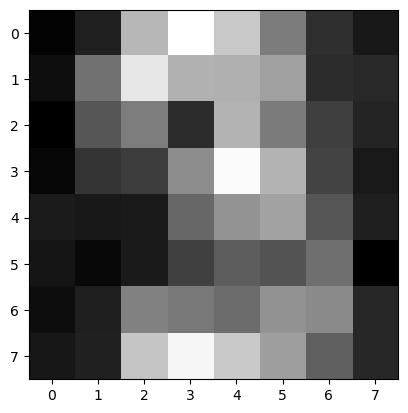

In [37]:
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Surfing the embedding manifold 

In [38]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
representation=feature_ext(train)

In [39]:
from scipy.spatial import distance 
N=10
vx = np.linspace(np.min(representation[:,0]),np.max(representation[:,0]),N)
vy = np.linspace(np.min(representation[:,1]),np.max(representation[:,1]),N)
print(vx,vy)

def is_visited(x,l):
    for item in l:
        if np.abs(x-item)<1e-10:
            return True
    return False

visited=[]
idx_mat=np.zeros((N,N))       

for i in range(N):
    for j in range(N):
        d = distance.cdist(np.array([vx[i],vy[j]])[np.newaxis,:], representation)
        idx_sort = np.argsort(d)[0]
        idx_not_visited=[tmp for tmp in idx_sort if not(is_visited(tmp,visited))]
        if len(idx_not_visited)>0:
            idx_mat[i,j] = idx_not_visited[0]
            visited.append(idx_not_visited[0])

[  0.          11.45990923  22.91981845  34.37972768  45.83963691
  57.29954614  68.75945536  80.21936459  91.67927382 103.13918304] [ 59.23780823  65.48552026  71.73323229  77.98094432  84.22865634
  90.47636837  96.7240804  102.97179243 109.21950446 115.46721649]


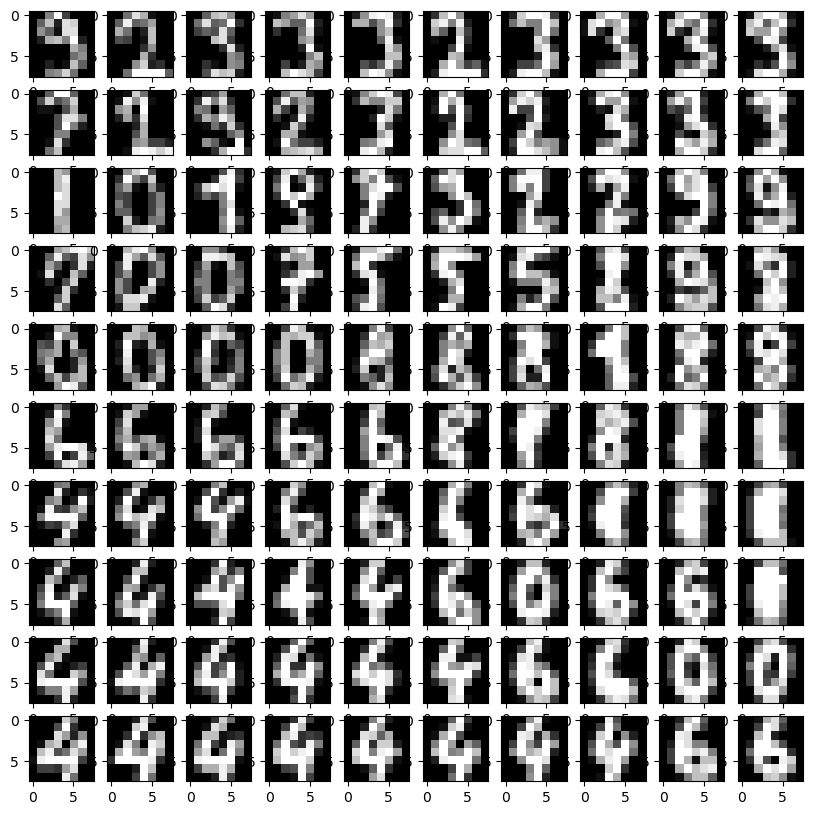

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        axarr[i,j].imshow(train[int(idx_mat[i,j]),:].reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

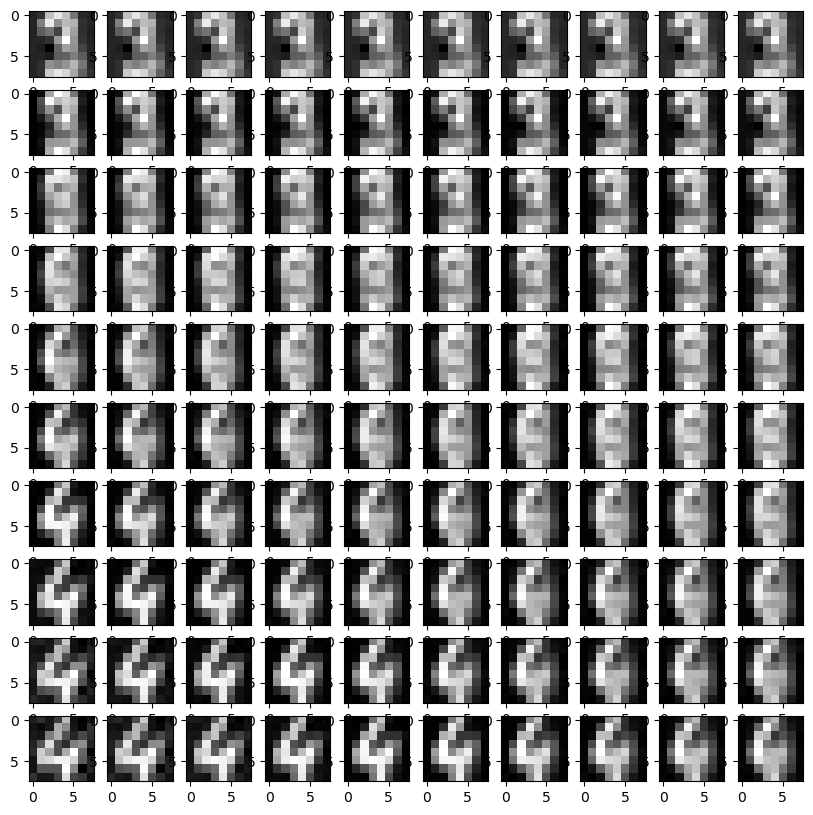

In [41]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        reconstruction = decoder(tf.constant(np.array([[vx[i],vy[j]]])))
        axarr[i,j].imshow(reconstruction.numpy().reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

# Some notes on Variational Autoencoders

Althought autoencoders already serve the trick for generating samples. It turns out that space from which we are generating seems to be composed of bubbles of information with bad interpolation properties among bubbles. In order to solve that issue and smooth the manifold Variational Autoencoders (VAE) are proposed.

<img src = "vae2_proc.png">

This probabilistic behavior requires the use of a different loss, Kullbakc-Leibler divergence.

In practice the latent space is going to be modeled as a Gaussian distribution, and thus two vectors are returned.

<img src = "vae2.png">

But... what is the distribution we are comparing with in the loss? We will use standard normal distribution, resulting in the following loss:


$$L (x,\hat{x}) = \|x-\hat{x}\| + KL(\mathcal{N}(\mu(x),\sigma(x)),\mathcal{N}(0,1))$$


Where this comes from?

We are using Variational Inference for learning. This is we are approximating the desired distribution $p(z|x)$ by a controlled set of base functions $q(z)$. Usually, we use mean field approximation in which we assume that all variables in $z$ are independent and Gaussian. This is $q_x(z) = \prod q_x(z^{(i)}) = \prod \mathcal{N}(\mu^{(i)}(x),\sigma^{(i)}(x))$.

Our goal is

$$\underset{\mu,\sigma}{\text{minimize}}\quad KL(q_x(z),p(z|x))$$

where 

$$KL(q(x)\|p(x)) = \mathbb{E}_{q(x)}[\log\frac{q(x)}{p(x)}] = \int_{-\infty}^{\infty} q(x) \log \frac{q(x)}{p(x)}dx$$,

thus 

$$KL(q_x(z),p(z|x)) = \mathbb{E}_{z\sim q(x)}[\log q(z) - \log p(z|x)] $$

$$= \mathbb{E}_{z\sim q(x)}[\log q(z)] - \mathbb{E}_{z\sim q(x)}[\log p(z|x)]$$

$$= \mathbb{E}_{z\sim q(z)}[\log q(x)] - \mathbb{E}_{z\sim q(x)}[\log p(x|z) + \log p(z) - \log p(x)]$$

$$= - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z) + \log p(x)]$$

Observe that $p(x)$ does not depend on $z$ so this term is irrelevant in terms of the minimization. Thus

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z)] = $$

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +KL(q(z)\|p(z))$$


considering $p(x|z)$ a Gaussian distribution, then 

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[-\frac{(x-f(z))^2}{2c}] +KL(q(z)\|p(z))$$

that shows the dual loss we brought up before. 

# Generative Adversarial Networks

This is a clever trick for guiding a network into mimicking a sampled data distribution. In a nutshell it consists of a two part process:

- **Part 1: The generator** A network plays the role of a generator. We input data coming from one well-known distribution such as a Normal distribution and the output is expected to be the type of data we desire, e.g. cat images, words, etc. Just as we saw with the decoder of the Auto-encoder.

- **Part 2: The discriminator** In order for the generator to be able to achieve its goal here comes the clever trick. A discriminator is trained with data coming from the true source we want to mimick and with the data coming from the generator. These are mixed. And the role of the discriminator is to tell apart real from fake data. 

In [42]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [43]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [44]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

noise = keras.Input(shape=(64,), name="random")

x = keras.layers.Dense(128,activation="relu")(noise)
x = keras.layers.Dense(64,activation="relu")(x)
gen_output = keras.layers.Dense(64)(x) # The same as the decoder
generator = keras.Model(inputs=noise, outputs=gen_output, name="generator")


In [45]:
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
GEN = tf.keras.Sequential()
GEN.add(generator)
GEN.compile(loss='least_squares', optimizer=optimizer,metrics=['rmse'])


In [46]:

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(64,activation="relu")(x)
dis_output = keras.layers.Dense(1)(x)

discriminator = keras.Model(inputs=input_img, outputs=dis_output, name="discriminator")


In [47]:
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
DM = tf.keras.Sequential()
DM.add(discriminator)
DM.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [48]:
generator.trainable=False
GAN = tf.keras.Sequential()
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

tf.Tensor(
[[-0.04309691  0.38261726 -0.07972274 -0.06646632 -0.0630457   0.22176997
  -0.18435416  0.265857    0.31321818 -0.5338824  -0.36930102  0.5891405
  -0.47179082 -0.16161954 -0.7717559  -0.03990106 -0.47396913  0.12815571
  -0.19173959 -0.07226437  0.31909618  0.4668085  -0.15080245 -0.08742473
   0.04443083 -0.0491317   0.13368216 -0.00758656 -0.1037999  -0.27137646
  -0.48439232  0.02537971  0.4612959   0.27706996  0.2223649  -0.20760567
   0.6661157  -0.15316787 -0.16910757 -0.00417144  0.12580983  0.29275933
   0.15016988 -0.02148819  0.36128116 -0.17271855  0.6938578   0.4615951
   0.28112143 -0.44168523 -0.4643383  -0.35246184  0.33978295  0.16236614
   0.44678688  0.3475331  -0.9042191   0.06057752 -0.04060382  0.62643856
  -0.4899583   0.709631    0.12998264  0.69976175]], shape=(1, 64), dtype=float32)


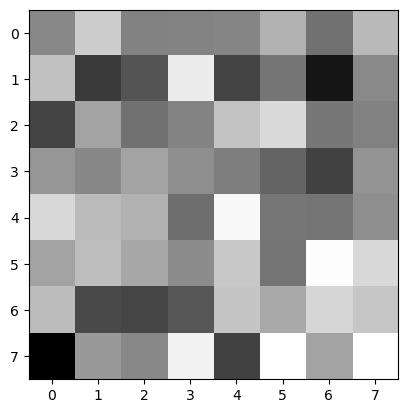

In [49]:
noise = tf.random.normal([1, 64])
generated_image = generator(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')

In [50]:
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [51]:
generate_latent_points(64,2)

array([[ 0.25475343,  0.25453145,  0.87830577, -0.40304602, -1.69220551,
        -0.28125735,  1.02291949,  0.32694863, -0.37515643,  2.83864852,
        -1.03398009, -1.05318304,  0.49251103,  0.8470704 ,  1.13793055,
         0.27922282,  0.09818291,  0.50768406, -0.95830665,  0.11762206,
         0.09413634,  0.63539782,  0.00516743, -2.53120861,  0.12414153,
        -0.44673837,  0.99115673, -0.60173096, -1.87552404,  1.11528901,
        -0.0804656 , -0.08106698,  0.35826801, -1.04813025, -0.56038606,
         0.28916368, -0.99388143,  0.71381828, -0.25202526, -0.06691857,
        -0.19251052,  2.26355541,  0.92956807,  1.59474443, -1.805027  ,
         1.67849694,  0.67181796,  0.58553141, -0.4797469 , -0.40700085,
         0.29003486,  0.79149534,  1.00780926,  1.43985466,  0.08877754,
         0.21269731,  0.06881917,  0.65577617, -1.56309884,  1.83702481,
         1.59507673, -0.33612366, -0.48700122, -1.80125399],
       [-0.87874619,  1.23570449, -1.43372832,  0.68235069, -0.

In [52]:
def generate_fake_samples(gen, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = gen.predict(x_input)
    # create 'fake' class labels (0)
    y = np.zeros((n_samples, 1))
    return X, y


In [53]:
generate_fake_samples(GEN,64,1)

1/1 [==============================] - 0s 55ms/step


(array([[ 1.37117863e-01,  3.91014665e-01,  4.26268131e-01,
          4.81962189e-02,  5.25477342e-03, -2.44286701e-01,
          3.11903834e-01, -2.71943927e-01,  3.01241547e-01,
         -4.32487160e-01, -2.73225337e-01,  5.46374321e-01,
         -8.15501869e-01, -2.66874209e-02, -3.56450737e-01,
          6.06997311e-01, -4.94183004e-01,  4.90279719e-02,
          5.21275364e-02, -2.20635921e-01, -2.18115635e-02,
          4.45245385e-01, -1.03267394e-01, -2.41936892e-01,
          1.71388283e-01,  1.90795675e-01,  3.12666222e-02,
         -1.24300569e-01,  2.06820413e-01, -9.35850322e-01,
         -6.64224625e-01, -2.20073853e-02,  4.04491931e-01,
          7.81253636e-01,  5.33055484e-01,  8.27703774e-02,
          5.56635022e-01, -5.19996025e-02, -2.27782771e-01,
         -1.18996993e-01,  4.51599270e-01,  4.79989275e-02,
          6.93934970e-04, -6.15992129e-01,  3.15409899e-01,
          9.31367725e-02,  2.99169689e-01, -3.02789718e-01,
          7.66543746e-01, -1.11586779e-0

In [54]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples, 1))
    return X, y

In [55]:
generate_real_samples(train,3)

(array([[ 0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 15., 12., 15.,
          0.,  0.,  0.,  0.,  2.,  2.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
          0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,
          0.,  0.,  0.,  0., 11., 15.,  4.,  1.,  0.,  0.,  1., 10., 16.,
         16., 16., 11.,  0.,  0.,  4., 16., 14., 12.,  8.,  3.,  0.],
        [ 0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
          3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,
          8., 16., 16.,  1.,  0.,  0.,  0.,  2., 16., 14., 16.,  5.,  1.,
          0.,  0., 11., 16., 16., 16., 16., 10.,  0.,  0.,  5.,  8., 11.,
         16.,  4.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  9., 16., 16., 16.,  7.,  0.,  0.,  3., 16., 11.,  4.,
          4.,  1.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9.,
         16.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 10., 16.,  8.,  0.,
          0.,  0.,  0.,  2.,  0.,  8., 14.,  0

In [56]:
def trainGAN(gen, dm, gan, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    print(bat_per_epo)
    print(half_batch)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(gen, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = dm.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples - we want the error to improve the generator thus the change
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss[0]))

In [57]:
trainGAN(GEN,DM,GAN,train,64,n_epochs=100)

6
128
4/4 [==============================] - 0s 2ms/step
>1, 1/6, d=0.220, g=13.366
4/4 [==============================] - 0s 2ms/step
>1, 2/6, d=0.292, g=6.925
4/4 [==============================] - 0s 2ms/step
>1, 3/6, d=1.103, g=0.759
4/4 [==============================] - 0s 1ms/step
>1, 4/6, d=1.192, g=1.065
4/4 [==============================] - 0s 2ms/step
>1, 5/6, d=0.507, g=0.958
4/4 [==============================] - 0s 2ms/step
>1, 6/6, d=0.551, g=0.792
4/4 [==============================] - 0s 2ms/step
>2, 1/6, d=0.576, g=0.764
4/4 [==============================] - 0s 2ms/step
>2, 2/6, d=0.517, g=0.684
4/4 [==============================] - 0s 2ms/step
>2, 3/6, d=0.666, g=0.667
4/4 [==============================] - 0s 2ms/step
>2, 4/6, d=0.727, g=0.673
4/4 [==============================] - 0s 2ms/step
>2, 5/6, d=0.594, g=0.718
4/4 [==============================] - 0s 2ms/step
>2, 6/6, d=0.637, g=0.959
4/4 [==============================] - 0s 2ms/step
>3, 1/6, d=0.476, 

>18, 4/6, d=0.500, g=0.624
4/4 [==============================] - 0s 2ms/step
>18, 5/6, d=0.492, g=0.588
4/4 [==============================] - 0s 2ms/step
>18, 6/6, d=0.597, g=0.594
4/4 [==============================] - 0s 2ms/step
>19, 1/6, d=0.487, g=0.614
4/4 [==============================] - 0s 2ms/step
>19, 2/6, d=0.538, g=0.589
4/4 [==============================] - 0s 2ms/step
>19, 3/6, d=0.520, g=0.584
4/4 [==============================] - 0s 1ms/step
>19, 4/6, d=0.533, g=0.586
4/4 [==============================] - 0s 2ms/step
>19, 5/6, d=0.609, g=0.604
4/4 [==============================] - 0s 1ms/step
>19, 6/6, d=0.593, g=0.611
4/4 [==============================] - 0s 1ms/step
>20, 1/6, d=0.527, g=0.614
4/4 [==============================] - 0s 2ms/step
>20, 2/6, d=0.521, g=0.601
4/4 [==============================] - 0s 2ms/step
>20, 3/6, d=0.519, g=0.602
4/4 [==============================] - 0s 2ms/step
>20, 4/6, d=0.505, g=0.597
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step
>36, 2/6, d=0.498, g=0.576
4/4 [==============================] - 0s 2ms/step
>36, 3/6, d=0.509, g=0.574
4/4 [==============================] - 0s 2ms/step
>36, 4/6, d=0.488, g=0.564
4/4 [==============================] - 0s 2ms/step
>36, 5/6, d=0.497, g=0.563
4/4 [==============================] - 0s 2ms/step
>36, 6/6, d=0.507, g=0.588
4/4 [==============================] - 0s 2ms/step
>37, 1/6, d=0.519, g=0.564
4/4 [==============================] - 0s 1ms/step
>37, 2/6, d=0.569, g=0.572
4/4 [==============================] - 0s 2ms/step
>37, 3/6, d=0.513, g=0.569
4/4 [==============================] - 0s 2ms/step
>37, 4/6, d=0.491, g=0.595
4/4 [==============================] - 0s 1ms/step
>37, 5/6, d=0.518, g=0.592
4/4 [==============================] - 0s 2ms/step
>37, 6/6, d=0.500, g=0.589
4/4 [==============================] - 0s 2ms/step
>38, 1/6, d=0.479, g=0.555
4/4 [==============================] - 0s 2ms/step
>38, 2/6, d=0

4/4 [==============================] - 0s 2ms/step
>53, 5/6, d=0.545, g=0.551
4/4 [==============================] - 0s 2ms/step
>53, 6/6, d=0.542, g=0.595
4/4 [==============================] - 0s 2ms/step
>54, 1/6, d=0.509, g=0.562
4/4 [==============================] - 0s 1ms/step
>54, 2/6, d=0.497, g=0.565
4/4 [==============================] - 0s 2ms/step
>54, 3/6, d=0.525, g=0.578
4/4 [==============================] - 0s 1ms/step
>54, 4/6, d=0.501, g=0.575
4/4 [==============================] - 0s 2ms/step
>54, 5/6, d=0.497, g=0.560
4/4 [==============================] - 0s 2ms/step
>54, 6/6, d=0.518, g=0.560
4/4 [==============================] - 0s 2ms/step
>55, 1/6, d=0.536, g=0.560
4/4 [==============================] - 0s 2ms/step
>55, 2/6, d=0.505, g=0.564
4/4 [==============================] - 0s 2ms/step
>55, 3/6, d=0.562, g=0.548
4/4 [==============================] - 0s 2ms/step
>55, 4/6, d=0.537, g=0.568
4/4 [==============================] - 0s 2ms/step
>55, 5/6, d=0

4/4 [==============================] - 0s 2ms/step
>71, 2/6, d=0.536, g=0.532
4/4 [==============================] - 0s 2ms/step
>71, 3/6, d=0.506, g=0.532
4/4 [==============================] - 0s 2ms/step
>71, 4/6, d=0.529, g=0.547
4/4 [==============================] - 0s 2ms/step
>71, 5/6, d=0.544, g=0.523
4/4 [==============================] - 0s 2ms/step
>71, 6/6, d=0.519, g=0.529
4/4 [==============================] - 0s 2ms/step
>72, 1/6, d=0.508, g=0.537
4/4 [==============================] - 0s 2ms/step
>72, 2/6, d=0.588, g=0.547
4/4 [==============================] - 0s 2ms/step
>72, 3/6, d=0.513, g=0.546
4/4 [==============================] - 0s 2ms/step
>72, 4/6, d=0.545, g=0.531
4/4 [==============================] - 0s 1ms/step
>72, 5/6, d=0.535, g=0.565
4/4 [==============================] - 0s 2ms/step
>72, 6/6, d=0.506, g=0.561
4/4 [==============================] - 0s 2ms/step
>73, 1/6, d=0.498, g=0.549
4/4 [==============================] - 0s 2ms/step
>73, 2/6, d=0

4/4 [==============================] - 0s 2ms/step
>88, 5/6, d=0.534, g=0.548
4/4 [==============================] - 0s 1ms/step
>88, 6/6, d=0.506, g=0.546
4/4 [==============================] - 0s 1ms/step
>89, 1/6, d=0.568, g=0.537
4/4 [==============================] - 0s 2ms/step
>89, 2/6, d=0.576, g=0.526
4/4 [==============================] - 0s 2ms/step
>89, 3/6, d=0.526, g=0.525
4/4 [==============================] - 0s 2ms/step
>89, 4/6, d=0.527, g=0.546
4/4 [==============================] - 0s 2ms/step
>89, 5/6, d=0.524, g=0.536
4/4 [==============================] - 0s 1ms/step
>89, 6/6, d=0.510, g=0.560
4/4 [==============================] - 0s 2ms/step
>90, 1/6, d=0.517, g=0.533
4/4 [==============================] - 0s 2ms/step
>90, 2/6, d=0.528, g=0.542
4/4 [==============================] - 0s 2ms/step
>90, 3/6, d=0.536, g=0.543
4/4 [==============================] - 0s 2ms/step
>90, 4/6, d=0.508, g=0.549
4/4 [==============================] - 0s 1ms/step
>90, 5/6, d=0

tf.Tensor(
[[-0.21362638  0.19818519 -0.23158798 -0.10388701 -0.45647788  0.6316229
  -0.25462326 -0.16408539 -0.12320489 -0.3302272  -0.63734573  0.5647829
  -0.8581882  -0.1689013  -0.61445445 -0.1892387  -0.6255481   0.3133489
   0.03821921 -0.1338732  -0.4309866   0.6456908  -0.17758559 -0.31170943
   0.8330325   0.4477582   0.27630052 -0.3123396  -0.677269   -0.63455
   0.10990894  0.96629465  0.48399764  0.81932825  0.07175963 -0.16364403
   0.12236254  0.17716396  0.06158905 -0.0852339   0.2566511  -0.46198413
   0.09567395 -0.86434114  0.6214286  -0.31826806  0.30481488  0.5208696
   0.7375778  -0.7916     -1.0049098  -0.35809648  0.5821074  -0.19660568
  -0.1583693  -0.11604418 -0.72835195 -0.14009662 -0.1682044   0.3626745
  -0.4578658   0.65374345  0.09693044  0.5879164 ]], shape=(1, 64), dtype=float32)


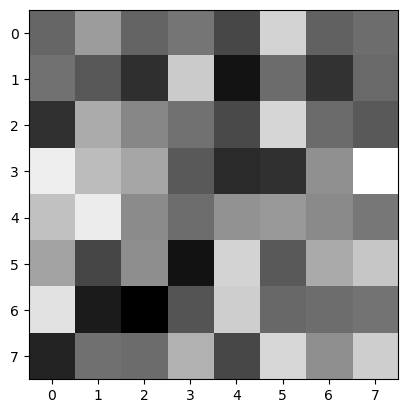

In [58]:
noise = tf.random.normal([1, 64])
generated_image = GEN(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')